In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Dataset/Salary_Data.csv')

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


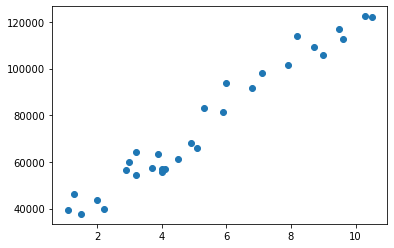

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['YearsExperience'], df['Salary'])
plt.show()

In [5]:
x = df.iloc[:,[0]].values
y = df.iloc[:,1].values
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [6]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state =0)

In [22]:
x_train.shape

(21, 1)

In [23]:
x_test.shape

(9, 1)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
y_pred = model.predict(x_test)
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [28]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088.])

In [29]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Difference in %':((y_pred-y_test)/(y_test)*100)})
df1

,Actual,Predicted,Difference in %
0,37731.0,40817.783270,8.181027
1,122391.0,123188.082589,0.651259
2,57081.0,65154.462615,14.143870
3,63218.0,63282.410357,0.101886
4,116969.0,115699.873560,-1.085011
5,109431.0,108211.664531,-1.114251
6,112635.0,116635.899689,3.552093
7,55794.0,64218.436486,15.099180
8,83088.0,76386.776158,-8.065213


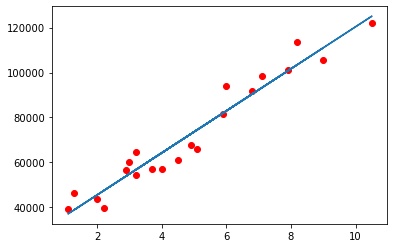

In [30]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train,c = 'r')
plt.plot(x_train,model.predict(x_train))

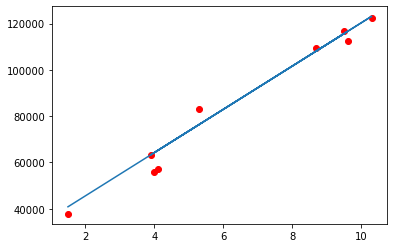

In [31]:
import matplotlib.pyplot as plt
plt.scatter(x_test,y_test,c = 'r')
plt.plot(x_test,model.predict(x_test))

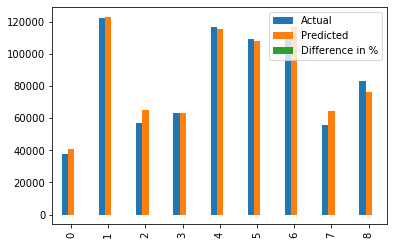

In [37]:
df2 = df1
df2.plot(kind='bar')
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [42]:
y_pred_unique = model.predict([[3]])
y_pred_unique

array([54858.17519978])

In [44]:
c = model.intercept_

In [45]:
m = model.coef_

In [46]:
y_f = m*3+c
y_f

array([54858.17519978])

In [56]:
#from sklearn.externals import joblib
import joblib

joblib.dump(model, 'Salary_model')

['Salary_model']

In [53]:
mj = joblib.load('Salary_model')

mj.predict([[3]])

array([54858.17519978])

In [80]:
import numpy as np
xyz = np.random.uniform(1,10,10)
xyz.sort()
xyz

array([1.55125091, 8.50059872, 8.31369982, 4.34560308, 4.4326871 ,
       2.45815765, 1.36272149, 8.06386274, 6.30122233, 4.68568887])

In [81]:
d = {'Years':xyz}
d

{'Years': array([1.55125091, 8.50059872, 8.31369982, 4.34560308, 4.4326871 ,
        2.45815765, 1.36272149, 8.06386274, 6.30122233, 4.68568887])}

In [82]:
df3 = pd.DataFrame(d)
df3

,Years
0,1.551251
1,8.500599
2,8.313700
3,4.345603
4,4.432687
5,2.458158
6,1.362721
7,8.063863
8,6.301222
9,4.685689


In [83]:
op=mj.predict(df3)
op

array([ 41297.5052094 , 106345.21644187, 104595.79391053,  67453.37159776,
        68268.50077481,  49786.38920112,  39532.82059173, 102257.2535478 ,
        85758.47877513,  70636.66350923])

In [84]:
df3['Experience']=op
df3

,Years,Experience
0,1.551251,41297.505209
1,8.500599,106345.216442
2,8.313700,104595.793911
3,4.345603,67453.371598
4,4.432687,68268.500775
5,2.458158,49786.389201
6,1.362721,39532.820592
7,8.063863,102257.253548
8,6.301222,85758.478775
9,4.685689,70636.663509


In [88]:
df3.to_csv('Prediction.csv')

In [89]:
pd.read_csv('Prediction.csv')

,Unnamed: 0,Years,Experience
0,0,1.551251,41297.505209
1,1,8.500599,106345.216442
2,2,8.313700,104595.793911
3,3,4.345603,67453.371598
4,4,4.432687,68268.500775
5,5,2.458158,49786.389201
6,6,1.362721,39532.820592
7,7,8.063863,102257.253548
8,8,6.301222,85758.478775
9,9,4.685689,70636.663509
